# WELCOME!

Welcome to **"Bike Demand Visualization Project"**. As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.



---
---



# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.  Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.  


# Tasks


### 1.Import libraries

In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

### 2.Read dataset

In [116]:
df = pd.read_csv("store_sharing.csv")

### 3.Check missing values and if there are any dublicate rows or not.

In [117]:
print(df.isnull().sum())

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64


In [118]:
print("Number of duplicate rows: ", df.duplicated().sum())

Number of duplicate rows:  0


### 4.Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)

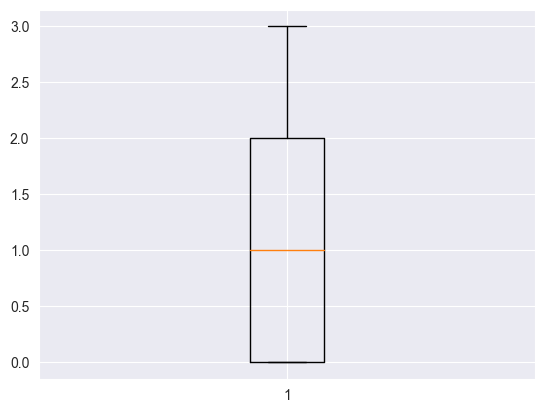

In [119]:
# season
plt.boxplot(df['season'])
plt.show()




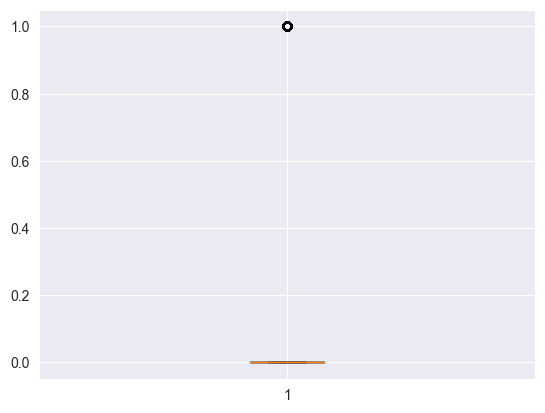

In [120]:
# is_holiday
plt.boxplot(df['is_holiday'])
plt.show()


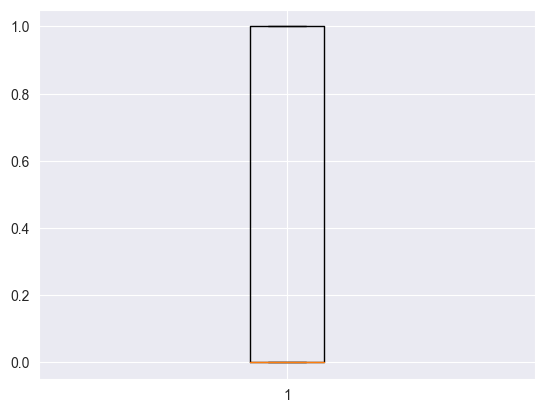

In [121]:
# is_weekend
plt.boxplot(df['is_weekend'])
plt.show()


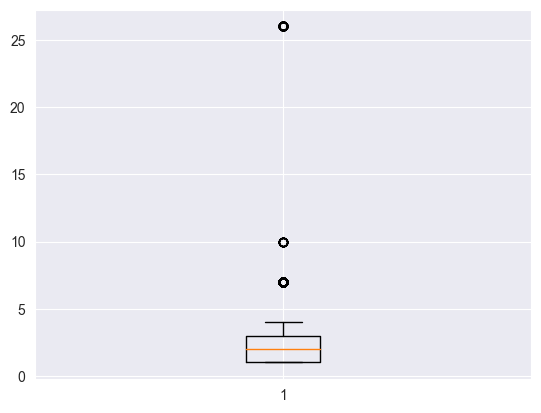

In [122]:
# weather_code
plt.boxplot(df['weather_code'])
plt.show()

### 5.Look at the data type of each variable, transform `timestamp` in type, and set it as index.

In [123]:
print(df.dtypes)

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object


In [124]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'] = df['timestamp'].astype('datetime64[ns]')
df = df.set_index('timestamp')
print(df.index)

DatetimeIndex(['2015-01-04 00:00:00', '2015-01-04 01:00:00',
               '2015-01-04 02:00:00', '2015-01-04 03:00:00',
               '2015-01-04 04:00:00', '2015-01-04 05:00:00',
               '2015-01-04 06:00:00', '2015-01-04 07:00:00',
               '2015-01-04 08:00:00', '2015-01-04 09:00:00',
               ...
               '2017-01-03 14:00:00', '2017-01-03 15:00:00',
               '2017-01-03 16:00:00', '2017-01-03 17:00:00',
               '2017-01-03 18:00:00', '2017-01-03 19:00:00',
               '2017-01-03 20:00:00', '2017-01-03 21:00:00',
               '2017-01-03 22:00:00', '2017-01-03 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=17414, freq=None)


- Tam 2 yillik bir timestamp var. `year, month, day_of_month, day_of_week, hour` bilgilerini alarak feature engineering yapalim

### 6.Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

you can use strftime('%Y-%m') for year_mount

In [125]:

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'
    
df.index = pd.to_datetime(df.index)
df['year'] = df.index.year
df['month'] = df.index.month
df['day of the month'] = df.index.day
df['day of the week'] = df.index.day_name()
df['hour'] = df.index.hour
df['season name'] = df['month'].apply(lambda x: get_season(x))




In [126]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day of the month,day of the week,hour,season name
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,Sunday,0,Winter
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,Sunday,1,Winter
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,Sunday,2,Winter
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,Sunday,3,Winter
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,Sunday,4,Winter


### 7.Visualize the correlation with a heatmap

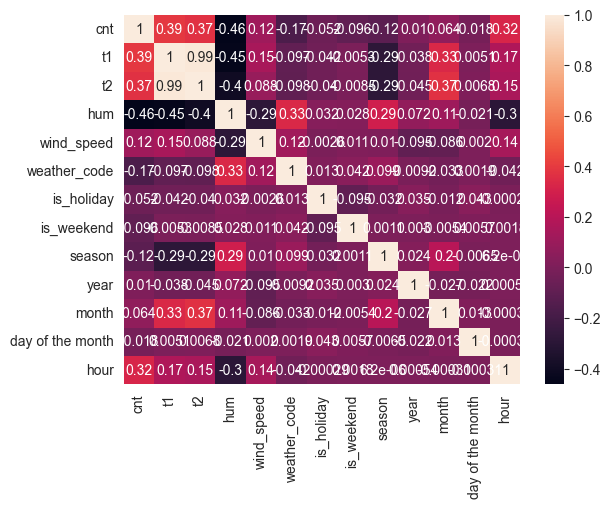

In [127]:
# for all variables 
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

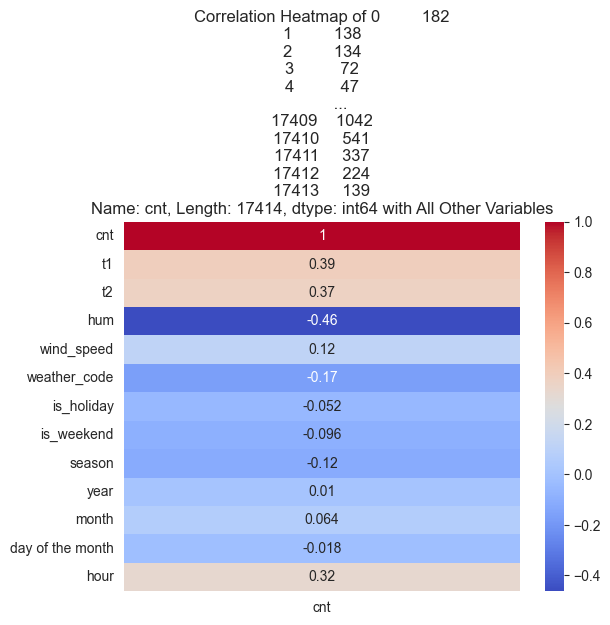

In [128]:
# for the target variable
# Select the numerical variables
df2 = df.reset_index()
new_df = df2.select_dtypes(include=[np.number])

col = new_df["cnt"]

# Create a dataframe with only the correlation values between the selected column and all other variables


col_name = col.name
corr_df = new_df.corr()[[col_name]]
#corr_df = corr_df.drop(labels=col)

# Plot the heatmap
sns.heatmap(corr_df, annot=True, cmap='coolwarm')

# Add a title to the plot
plt.title(f'Correlation Heatmap of {col} with All Other Variables')

# Show the plot
plt.show()


### 8. Visualize the correlation of the target variable and the other features with barplot

In [129]:
#with pandas
df2 = df.reset_index()
new_df = df2.select_dtypes(include=[np.number])

col = new_df["cnt"]
col_name = col.name

# Create a dataframe with only the correlation values between the selected column and all other variables
corr_df = new_df.corr()[[col_name]]

# Print the correlation values
print(corr_df)


                       cnt
cnt               1.000000
t1                0.388798
t2                0.369035
hum              -0.462901
wind_speed        0.116295
weather_code     -0.166633
is_holiday       -0.051698
is_weekend       -0.096499
season           -0.116180
year              0.010046
month             0.063757
day of the month -0.017887
hour              0.324423


### 9.Plot bike shares over time use lineplot

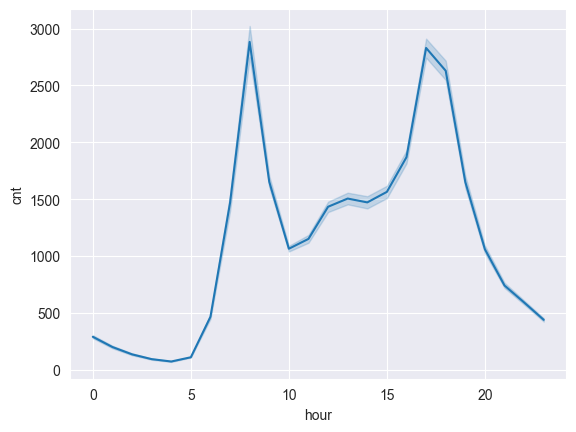

In [130]:
sns.lineplot(x="hour", y="cnt",
             data=df)
plt.show()

### 10.Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)

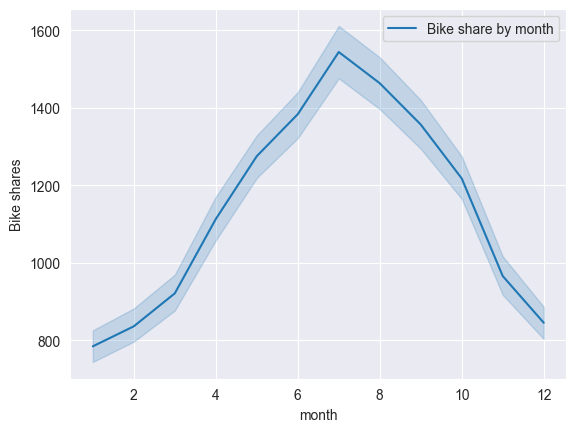

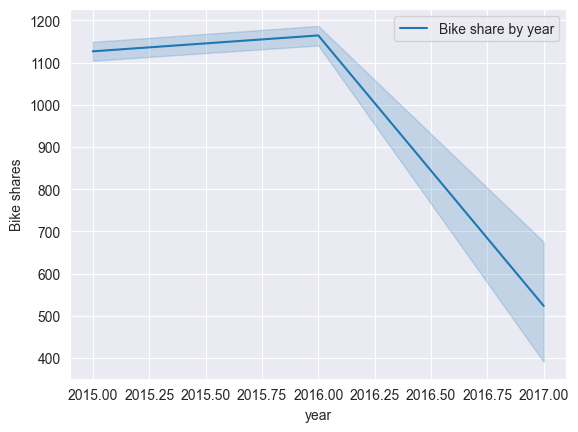

In [131]:
# with lineplot
sns.lineplot(x='month', y='cnt', data=df, label='Bike share by month')
plt.ylabel('Bike shares')
plt.show()
sns.lineplot(x='year', y='cnt', data=df, label='Bike share by year')
plt.ylabel('Bike shares')
plt.show()

In [132]:
# with lineplot


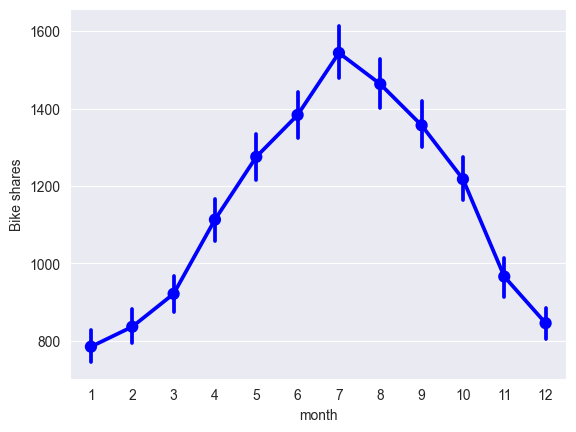

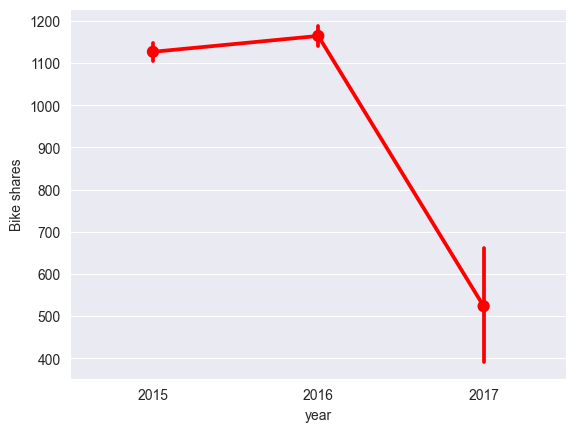

In [133]:
# with pointplot
sns.pointplot(x='month', y='cnt', data=df, color = 'b')
plt.ylabel('Bike shares')
plt.show()
sns.pointplot(x='year', y='cnt', data=df, color = 'r')
plt.ylabel('Bike shares')
plt.show()


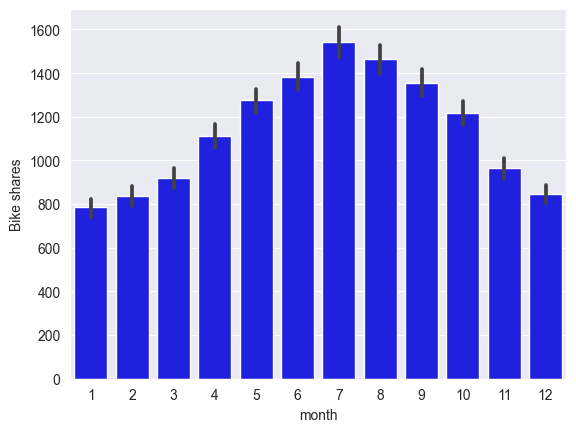

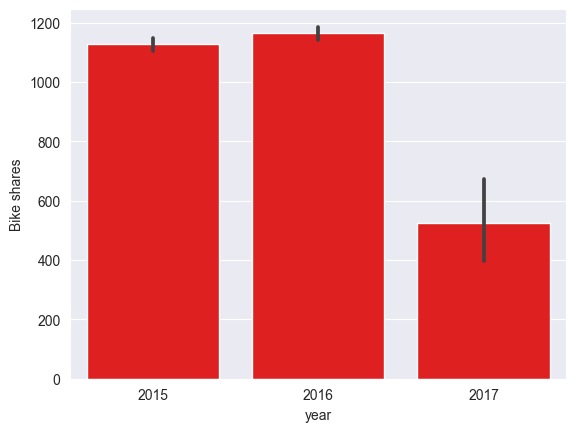

In [134]:
# with barplot
sns.barplot(x='month', y='cnt', data=df, color = 'b')
plt.ylabel('Bike shares')
plt.show()
sns.barplot(x='year', y='cnt', data=df, color = 'r')
plt.ylabel('Bike shares')
plt.show()


### 11.Plot bike shares by hours on (holidays, weekend, season)

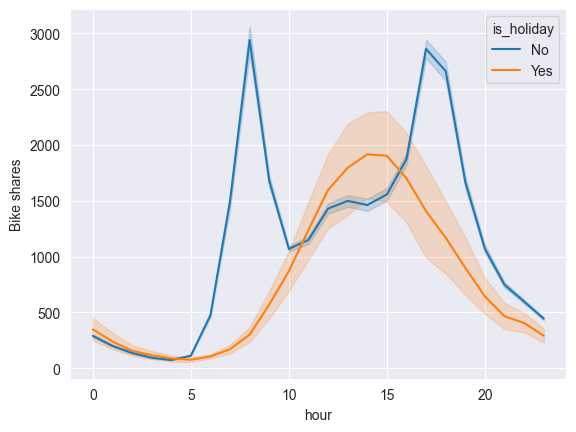

In [135]:
# with lineplot (*whether it is a holiday or not*)
df2= df.copy()
df2['is_holiday'] = df2['is_holiday'].replace({0: 'No', 1: 'Yes'})
sns.lineplot(x='hour', y='cnt', data=df2, hue='is_holiday')
plt.ylabel('Bike shares')
plt.show()

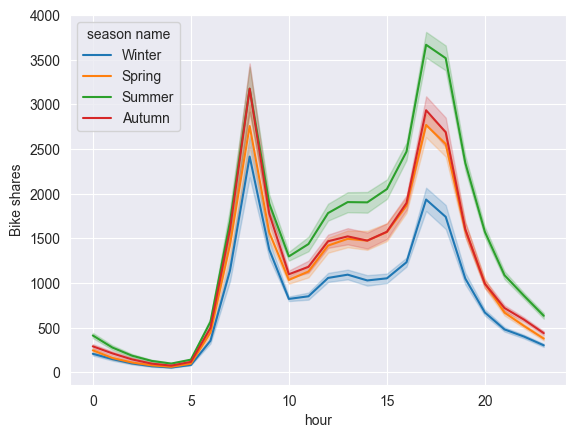

In [136]:
# with lineplot (*You may want to see seasonal breakdowns*)
sns.lineplot(x='hour', y='cnt', data=df, hue='season name')
plt.ylabel('Bike shares')
plt.show()


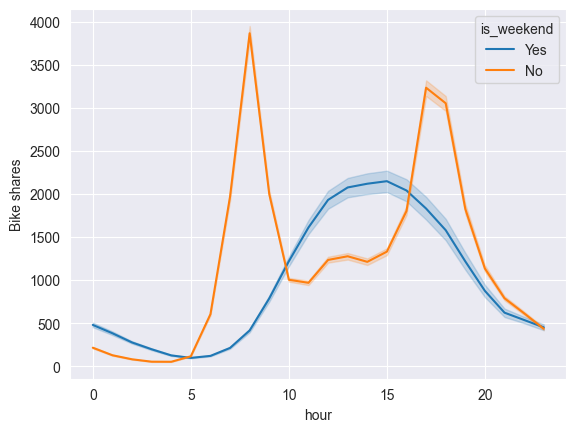

In [137]:
# is weekend
df2= df.copy()
df2['is_weekend'] = df2['is_weekend'].replace({0: 'No', 1: 'Yes'})
sns.lineplot(x='hour', y='cnt', data=df2, hue='is_weekend')
plt.ylabel('Bike shares')
plt.show()

### 12.Plot bike shares by day of week
- You may want to see whether it is a holiday or not

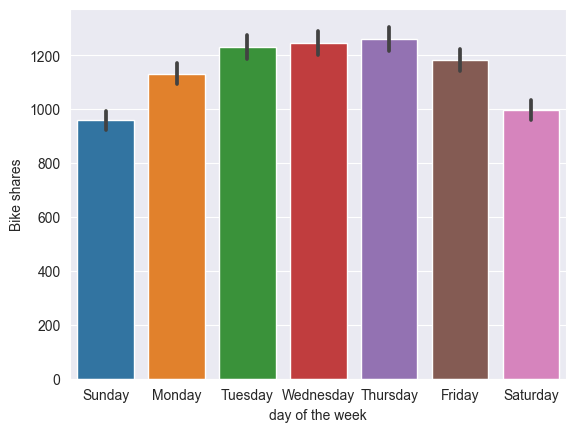

In [139]:
# with barplot
sns.barplot(x='day of the week', y='cnt', data=df)
plt.ylabel('Bike shares')
plt.show()


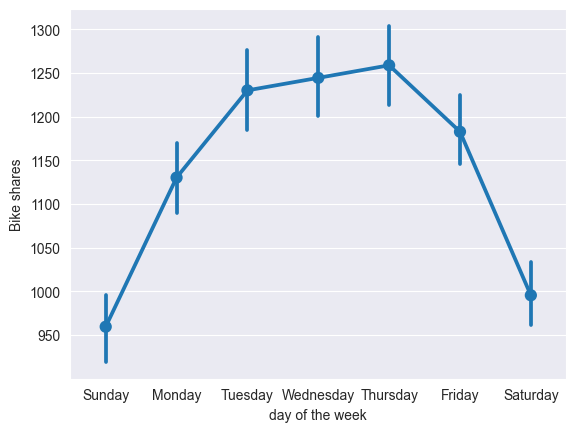

In [140]:
# with pointplot
sns.pointplot(x='day of the week', y='cnt', data=df)
plt.ylabel('Bike shares')
plt.show()

### 13.Plot bike shares by day of month

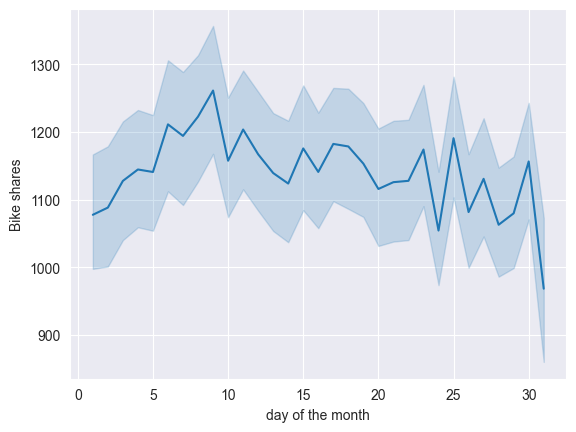

In [141]:
#with lineplot
sns.lineplot(x='day of the month', y='cnt', data=df)
plt.ylabel('Bike shares')
plt.show()


### 14.Plot bike shares by year
### Plot bike shares on holidays by seasons

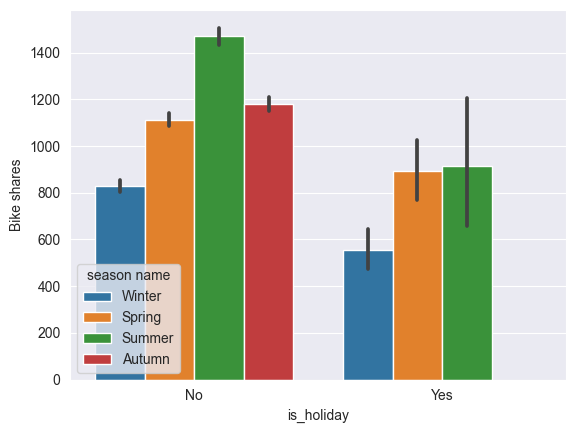

In [143]:
# with barplot
df2= df.copy()
df2['is_holiday'] = df2['is_holiday'].replace({0: 'No', 1: 'Yes'})
sns.barplot(x='is_holiday', y='cnt', data=df2, hue='season name')
plt.ylabel('Bike shares')
plt.show()


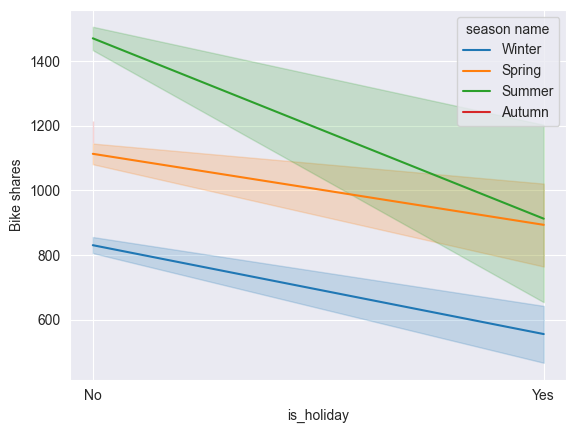

In [144]:
# with lineplot
df2= df.copy()
df2['is_holiday'] = df2['is_holiday'].replace({0: 'No', 1: 'Yes'})
sns.lineplot(x='is_holiday', y='cnt', data=df2, hue='season name')
plt.ylabel('Bike shares')
plt.show()

### 15.Visualize the distribution of bike shares by weekday/weekend with piechart and barplot

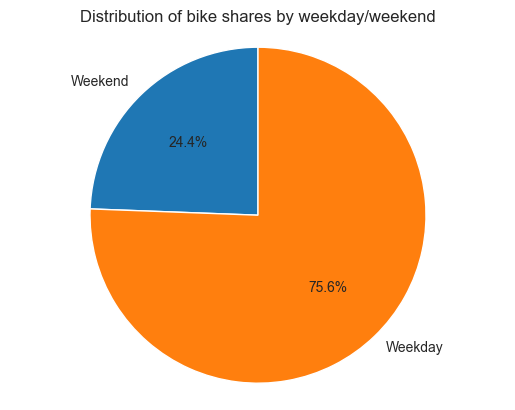

In [157]:
# Pie chart
weekend_shares = df[df['is_weekend'] == 1]['cnt'].sum()
weekday_shares = df[df['is_weekend'] == 0]['cnt'].sum()
labels = ['Weekend', 'Weekday']
sizes = [weekend_shares, weekday_shares]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of bike shares by weekday/weekend')
plt.show()



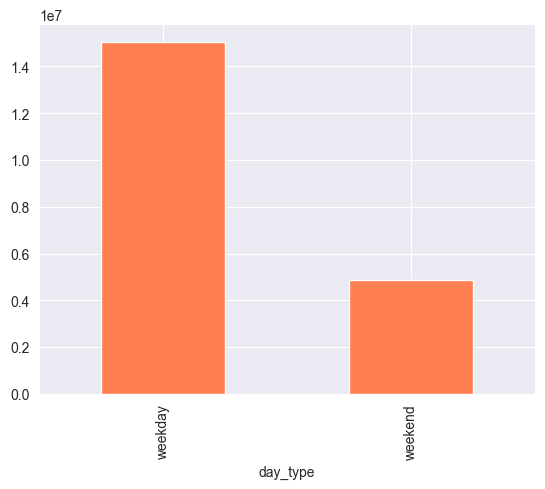

In [148]:
# bar plot
df2 = df.copy()
df2['day_type'] = df2['is_weekend'].replace({0: 'weekday', 1: 'weekend'})
#apply(lambda x: 'Weekend' if x else 'Weekday')
df2.groupby(['day_type'])['cnt'].sum().plot(kind='bar', color='coral')
plt.show()

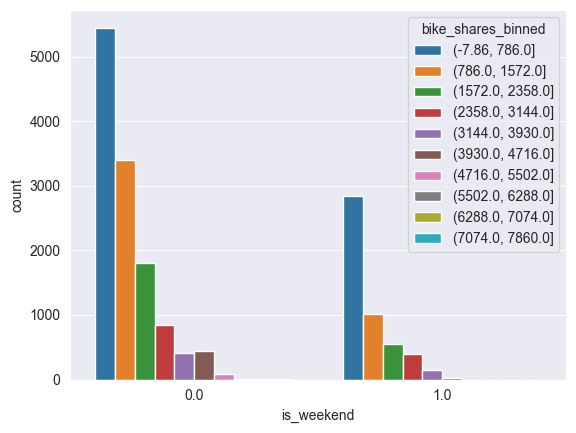

In [158]:
# with countplot


df['bike_shares_binned'] = pd.cut(df['cnt'], bins=10)

sns.countplot(x='is_weekend', hue='bike_shares_binned', data=df)

plt.show()


### 16.Plot the distribution of weather code by seasons

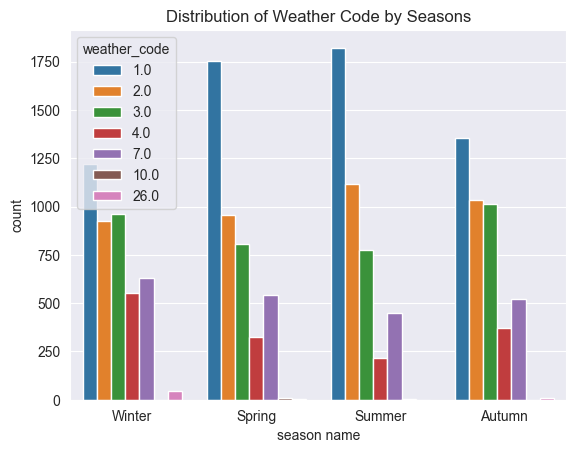

In [ ]:
# with countplot
sns.countplot(x='season name', hue='weather_code', data=df)

# Add a title to the plot
plt.title('Distribution of Weather Code by Seasons')

# Show the plot
plt.show()

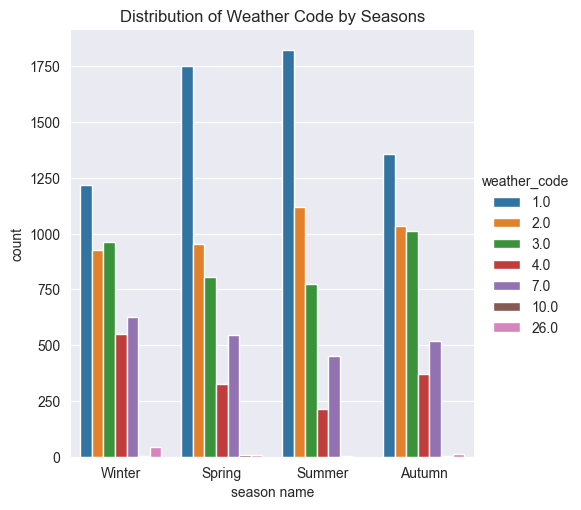

In [ ]:
# with catplot
sns.catplot(x='season name', hue='weather_code', kind='count', data=df)

# Add a title to the plot
plt.title('Distribution of Weather Code by Seasons')

# Show the plot
plt.show()
